In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
Stock = pd.read_csv('/content/AAPL_2006-01-01_to_2018-01-01.csv')

df_Stock = Stock
# df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [3]:
df_Stock.tail(5)

,Date,Open,High,Low,Close,Volume,Name
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL
3018,2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL


In [4]:
df_Stock.shape

(3019, 7)

In [5]:
df_Stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

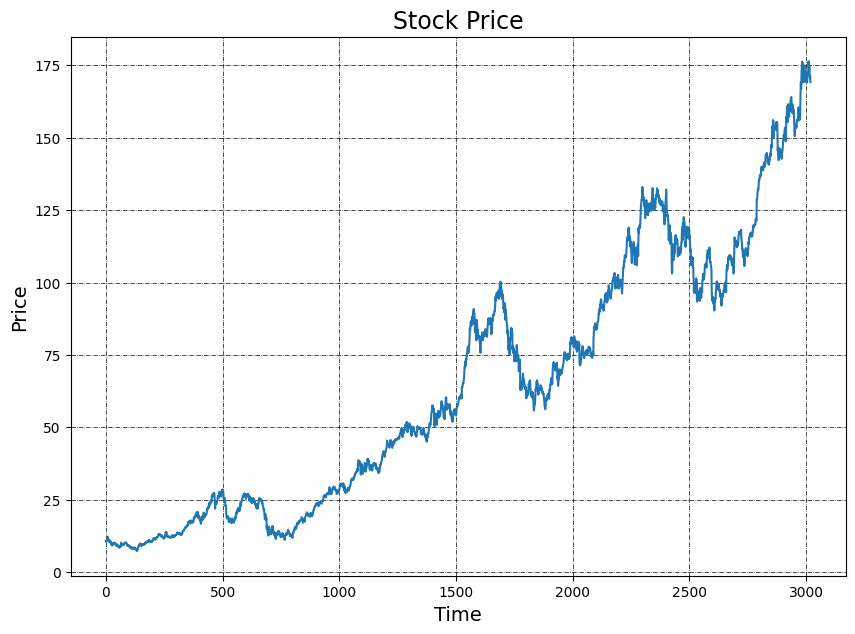

In [6]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [7]:
df_Stock

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...,...
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL


In [8]:
df_Stock = df_Stock.drop('Date', axis=1)

In [9]:
df_Stock = df_Stock.drop('Name', axis=1)

In [10]:
def create_train_test_set(df_Stock):

    features = df_Stock.drop(columns=['Close'], axis=1)
    target = df_Stock['Close']

#     print(target)


    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [11]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

print(X_train)
print(Y_train)

Historical Stock Data length is -  3019
Training Set length -  2656
Validation Set length -  301
Test Set length -  60
(2656, 4) (301, 4) (62, 4)
(2656,) (301,) (62,)
        Open    High    Low     Volume
0      10.34   10.68  10.32  201853036
1      10.73   10.85  10.64  155225609
2      10.69   10.70  10.54  112396081
3      10.75   10.96  10.65  176139334
4      10.96   11.03  10.82  168861224
...      ...     ...    ...        ...
2651   98.70  100.13  98.60   36493867
2652   99.56  100.00  99.34   23779924
2653  100.00  100.46  99.74   26275968
2654   99.83  101.00  99.13   32702028
2655   99.26   99.30  98.31   28313669

[2656 rows x 4 columns]
0       10.68
1       10.71
2       10.63
3       10.90
4       10.86
        ...  
2651    99.83
2652    99.87
2653    99.96
2654    99.43
2655    98.66
Name: Close, Length: 2656, dtype: float64


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-6.11000815e-01  8.36566703e-01  7.74424264e-01  2.16938911e-10]
LR Intercept: 
 -0.037590170750917196


In [14]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9998909402847472


In [15]:
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [17]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.54
Training Mean Squared Error: 0.15
Training RMSE:  0.38
Training MAE:  0.25
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.28
Validation Mean Squared Error: 0.15
Validation RMSE:  0.49
Validation MAE:  0.36
 
Test R-squared:  0.99
Test Explained Variation:  0.99
Test MAPE: 0.24
Test Mean Squared Error: 0.28
Test RMSE:  0.53
Test MAE:  0.4


In [18]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
# df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,index,Actual,Predicted
0,2656,97.34,97.683793
1,2657,96.67,97.445939
2,2658,102.95,103.147327
3,2659,104.34,104.147540
4,2660,104.21,104.063608
...,...,...,...
296,2952,153.14,153.469423
297,2953,154.23,154.334649
298,2954,153.28,153.260364
299,2955,154.12,153.009194


<Axes: >

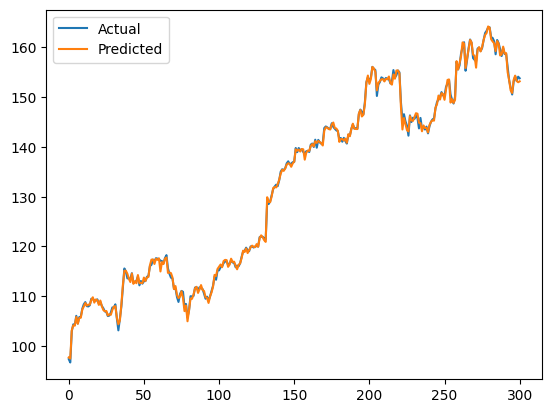

In [19]:
df_pred[['Actual', 'Predicted']].plot()

In [20]:
print(df_pred['Predicted'])

0       97.683793
1       97.445939
2      103.147327
3      104.147540
4      104.063608
          ...    
296    153.469423
297    154.334649
298    153.260364
299    153.009194
300    153.191281
Name: Predicted, Length: 301, dtype: float64


In [21]:
predicted_array = df_pred['Predicted'].values
actual_array = df_pred['Actual'].values
# print(predicted_array)

In [22]:
returns = []
def calculate_returns(stock_prices):

    for i in range(1, len(stock_prices)):
        previous_price = stock_prices[i - 1]
        current_price = stock_prices[i]
        daily_return = (current_price - previous_price) / previous_price
        returns.append(daily_return)

    return returns

In [23]:
calculate_returns(predicted_array)

[-0.002434938409375102,
 0.05850821217135003,
 0.009696942244874752,
 -0.0008058987718434548,
 0.017024970345894386,
 -0.013109281600197331,
 0.011113232168895936,
 0.0005466437866021535,
 0.015696368746711778,
 0.0055420261456933665,
 0.006494822995438104,
 -0.004795124843655105,
 0.0019578152291627507,
 -0.0001283434666264568,
 0.00862581077407089,
 0.00497711575530542,
 -0.009758080844910788,
 0.005877028561176462,
 -0.0014087289137258456,
 -0.008640274904104362,
 0.008080088500077473,
 -0.010229539456948229,
 -0.007287329238469514,
 -0.0022348714055557706,
 0.0003734119049879469,
 -0.00838342117577971,
 0.0023893712627395948,
 -0.0010999051910575667,
 0.009222471188293604,
 0.006184840950008124,
 0.0008359899645435499,
 -0.0213630238968421,
 -0.012654823965816065,
 0.007196881066951849,
 0.030923913872463685,
 0.03567922897592576,
 0.025901954040935045,
 -0.00010100822956410345,
 -0.005385124057096487,
 -0.008660989541033925,
 -0.005739784820045824,
 0.015031957956632624,
 -0.01799

In [24]:
length = len(predicted_array)
print(length)

301


In [25]:
returns1 = []
def calculate_returns1(stock_prices):


    for i in range(1, len(stock_prices)):
        previous_price = stock_prices[i - 1]
        current_price = stock_prices[i]
        daily_return = (current_price - previous_price) / previous_price
        returns1.append(daily_return)

    return returns1

In [26]:
calculate_returns1(actual_array)

[-0.006883090199301435,
 0.0649632771283749,
 0.013501699854298208,
 -0.001245926777841764,
 0.017656654831590093,
 -0.014804337576614741,
 0.012538284839203696,
 0.0007562151432082266,
 0.015207329744025685,
 0.00828061034611091,
 0.004060164252099268,
 -0.007444168734491336,
 -0.000648148148148085,
 0.002316316130825535,
 0.01201700868922164,
 -0.0009134088417976664,
 -0.0014627902724446572,
 -0.0012818165171214115,
 0.0025669233590025773,
 -0.007772494513533233,
 0.0031333517648142032,
 -0.007533302710151522,
 -0.004258076460242599,
 -0.005856651482755373,
 -0.0011221245558257391,
 -0.007676465081445359,
 0.0009433962264150407,
 0.005937794533459093,
 0.0093694368968425,
 -0.00027847396268449956,
 0.006128133704735344,
 -0.026208933185677404,
 -0.022649734647460205,
 0.022398913992048894,
 0.023805007587253464,
 0.035386753126447366,
 0.033998389549968665,
 -0.005624296962879567,
 -0.011660285415941555,
 -8.804366966019647e-05,
 -0.00017610284406089656,
 0.009423161602818208,
 -0.01

In [27]:
length = len(actual_array)
print(length)

301


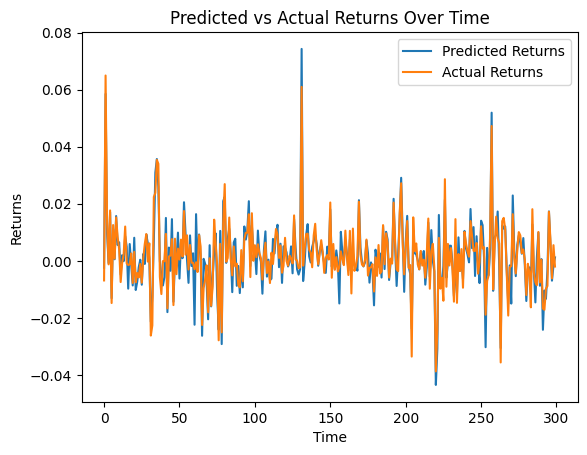

In [28]:
import matplotlib.pyplot as plt

# Assuming predicted_array contains the predicted returns and actual_returns contains the actual returns
plt.plot(returns[:300], label='Predicted Returns')
plt.plot(returns1, label='Actual Returns')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Predicted vs Actual Returns Over Time')
plt.legend()
plt.show()
